In [13]:
import pandas as pd
from scipy.stats import shapiro


df=pd.read_csv('Alzheimers Mice Data.csv')

df.head()


,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


# Assumption 3

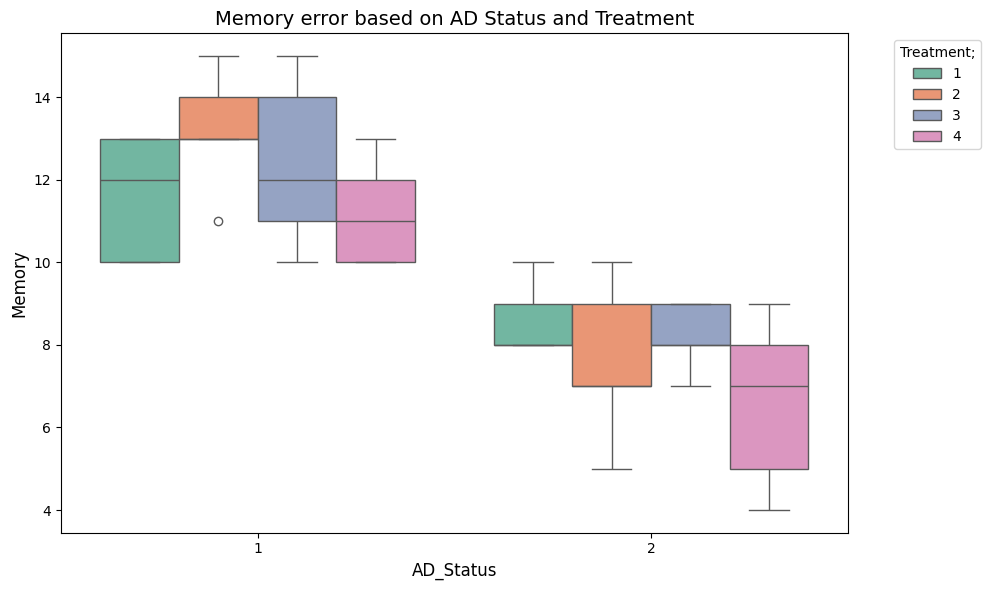

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='AD_Status', y='Memory', hue='Treatment', data=df, palette="Set2", dodge=True)

plt.title("Memory error based on AD Status and Treatment", fontsize=14)
plt.xlabel("AD_Status", fontsize=12)
plt.ylabel("Memory", fontsize=12)
plt.legend(title="Treatment;", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

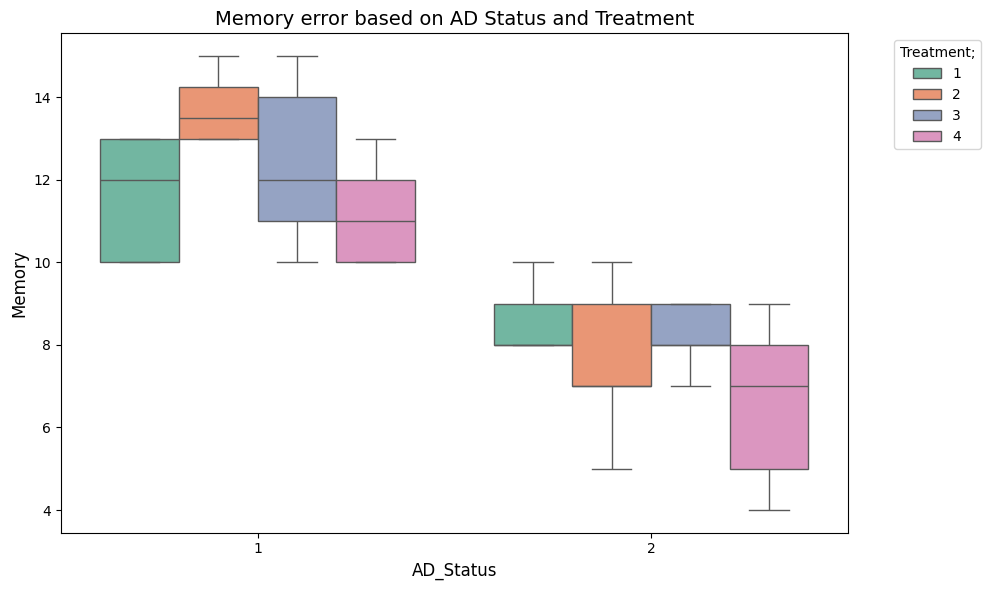

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[~((df['AD_Status'] == 1) & (df['Treatment'] == 2) & (df['Memory'] == 11))]

plt.figure(figsize=(10, 6))

sns.boxplot(x='AD_Status', y='Memory', hue='Treatment', data=df, palette="Set2", dodge=True)

plt.title("Memory error based on AD Status and Treatment", fontsize=14)
plt.xlabel("AD_Status", fontsize=12)
plt.ylabel("Memory", fontsize=12)
plt.legend(title="Treatment;", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Normality Test

In [21]:
from IPython.display import display


normality ={}
for i in df['Treatment'].unique():
    for j in df['AD_Status'].unique():
        group_normal=df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Memory']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}

display(normality)

{(1, 1): {'Statistic': 0.8029904417735476, 'p-value': 0.08569260402621937},
 (1, 2): {'Statistic': 0.7709079337590306, 'p-value': 0.04595431783856295},
 (2, 1): {'Statistic': 0.8633690522514251, 'p-value': 0.2724531634568226},
 (2, 2): {'Statistic': 0.9529604619046342, 'p-value': 0.7583121101708065},
 (3, 1): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309},
 (3, 2): {'Statistic': 0.8810376385817489, 'p-value': 0.3140395561440371},
 (4, 1): {'Statistic': 0.9020198201298121, 'p-value': 0.4211496535161197},
 (4, 2): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309}}

# Levene's Test

In [4]:
from scipy.stats import levene

group_levene = [df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Memory']
          for i in df['Treatment'].unique() for j in df['AD_Status'].unique()]

levene_stat, levene_p = levene(*group_levene)
float(levene_stat), float(levene_p)
print(f"Statistic: {levene_stat} p-value: {levene_p}")

Statistic: 0.8274582560296847 p-value: 0.5722200263972536


# ANOVA Test

In [5]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
model = ols('Memory ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(AD_Status),189.225,1.0,75.313433,6.449421e-10
C(Treatment),14.475,3.0,1.920398,1.461176e-01
C(AD_Status):C(Treatment),8.675,3.0,1.150912,3.436263e-01
Residual,80.400,32.0,NaN,NaN


# Welch's ANOVA

In [26]:
from scipy.stats import f_oneway
import pingouin as pg

result_treatment = pg.welch_anova(dv='Memory', between='Treatment', data=df)
result_ad_status = pg.welch_anova(dv='Memory', between='AD_Status', data=df)

print(result_ad_status)
print(result_treatment)

      Source  ddof1      ddof2          F         p-unc       np2
0  AD_Status      1  36.583277  68.291999  6.889967e-10  0.649246
      Source  ddof1      ddof2        F     p-unc       np2
0  Treatment      3  18.732393  0.50504  0.683481  0.046949


# Post Hoc

In [27]:
import scikit_posthocs as sp

posthoc_result = sp.posthoc_dunn(df, val_col='Memory', group_col='AD_Status', p_adjust='bonferroni')

print(posthoc_result)

              1             2
1  1.000000e+00  1.625935e-07
2  1.625935e-07  1.000000e+00
